*Use this notebook to complete the sentence similarity and embedding visualization tasks.*


## Cosine Similarity Comparison

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize

def tokenize_text(text):
    return word_tokenize(text.lower())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\huoji\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
nltk_data_path = r'C:\Users\huoji\AppData\Roaming\nltk_data'
if nltk_data_path not in nltk.data.path:
    nltk.data.path.append(nltk_data_path)

nltk.download('punkt')
nltk.download('punkt_tab') 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\huoji\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\huoji\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [3]:
# List of sentences for comparison
sentences = [
    "The cat sat on the mat.",
    "A dog is playing in the yard.",
    "I need to buy groceries today.",
    "The feline was resting on the rug.",
    "Canines enjoy outdoor activities.",
    "My shopping list includes milk and bread.",
    "The weather is beautiful today.",
    "Programming requires logical thinking."
]

# Query sentence
query = "My pet cat is sleeping on the carpet."

In [4]:
import pickle
with open('word2vec_embeddings.pkl', 'rb') as f:
    pytorch_text8_data = pickle.load(f)
py_emb = pytorch_text8_data['embeddings']
py_word2idx = pytorch_text8_data['word2idx']
py_idx2word = pytorch_text8_data['idx2word']
with open('word2vec_gensim_embeddings.pkl', 'rb') as f:
    gensim_text8_data = pickle.load(f)
gensim_emb = gensim_text8_data['embeddings']
gensim_word2idx = gensim_text8_data['word2idx']
gensim_idx2word = gensim_text8_data['idx2word']

In [5]:
from gensim.models import KeyedVectors

google_model = KeyedVectors.load('word2vec-google-news-300.model')
google_emb = google_model.vectors  
google_word2idx = google_model.key_to_index

In [ ]:
from gensim.models import KeyedVectors

fasttext_model = KeyedVectors.load('fasttext-wiki-news-subwords-300.model')

fasttext_emb = fasttext_model.vectors
fasttext_word2idx = fasttext_model.key_to_index

In [28]:
def get_sentence_embedding(words, embeddings, word2idx):
    result_embeddings = []
    for word in words:
        if word in word2idx:
            idx = word2idx[word]
            result_embeddings.append(embeddings[idx])

    if not result_embeddings:
        return np.zeros(embeddings.shape[1])
    return np.mean(result_embeddings, axis=0)

In [9]:
models = [
    ("PyTorch", py_emb, py_word2idx),
    ("Gensim-Text8", gensim_emb, gensim_word2idx),
    ("Google-News", google_emb, google_word2idx),
    ("FastText", fasttext_emb, fasttext_word2idx)
]

In [32]:
def compute_cosine_sim(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    norm1 = np.linalg.norm(vec1)
    norm2 = np.linalg.norm(vec2)

    if norm1 == 0 or norm2 == 0:
        return 0.0
    
    return dot_product / (norm1 * norm2)

In [33]:
for name, emb, w2idx in models:
    print(f"\n--- Results for {name} ---")
    q_emb = get_sentence_embedding(tokenize_text(query), emb, w2idx)
    for s in sentences:
        s_emb = get_sentence_embedding(tokenize_text(s), emb, w2idx)
        sim = compute_cosine_sim(q_emb, s_emb)
        print(f"Score: {sim} | Sentence: {s}")


--- Results for PyTorch ---
Score: 0.5076658129692078 | Sentence: The cat sat on the mat.
Score: 0.37390151619911194 | Sentence: A dog is playing in the yard.
Score: 0.339815229177475 | Sentence: I need to buy groceries today.
Score: 0.4192095696926117 | Sentence: The feline was resting on the rug.
Score: 0.3276064097881317 | Sentence: Canines enjoy outdoor activities.
Score: 0.5352279543876648 | Sentence: My shopping list includes milk and bread.
Score: 0.42515861988067627 | Sentence: The weather is beautiful today.
Score: 0.23876526951789856 | Sentence: Programming requires logical thinking.

--- Results for Gensim-Text8 ---
Score: 0.7021430134773254 | Sentence: The cat sat on the mat.
Score: 0.5911841988563538 | Sentence: A dog is playing in the yard.
Score: 0.18436211347579956 | Sentence: I need to buy groceries today.
Score: 0.5043204426765442 | Sentence: The feline was resting on the rug.
Score: 0.10210976749658585 | Sentence: Canines enjoy outdoor activities.
Score: 0.474555343

## t-SNE and UMAP visualization

In [34]:
animals = [
    'dog', 'cat', 'horse', 'cow',
    'lion', 'tiger', 'elephant', 'giraffe',
    'eagle', 'hawk', 'sparrow', 'penguin',
    'shark', 'whale', 'dolphin', 'tuna'
]

foods = [
    'apple', 'orange', 'banana', 'grape',
    'bread', 'pasta', 'rice', 'potato',
    'chicken', 'beef', 'pork', 'fish',
    'coffee', 'tea', 'juice', 'water'
]

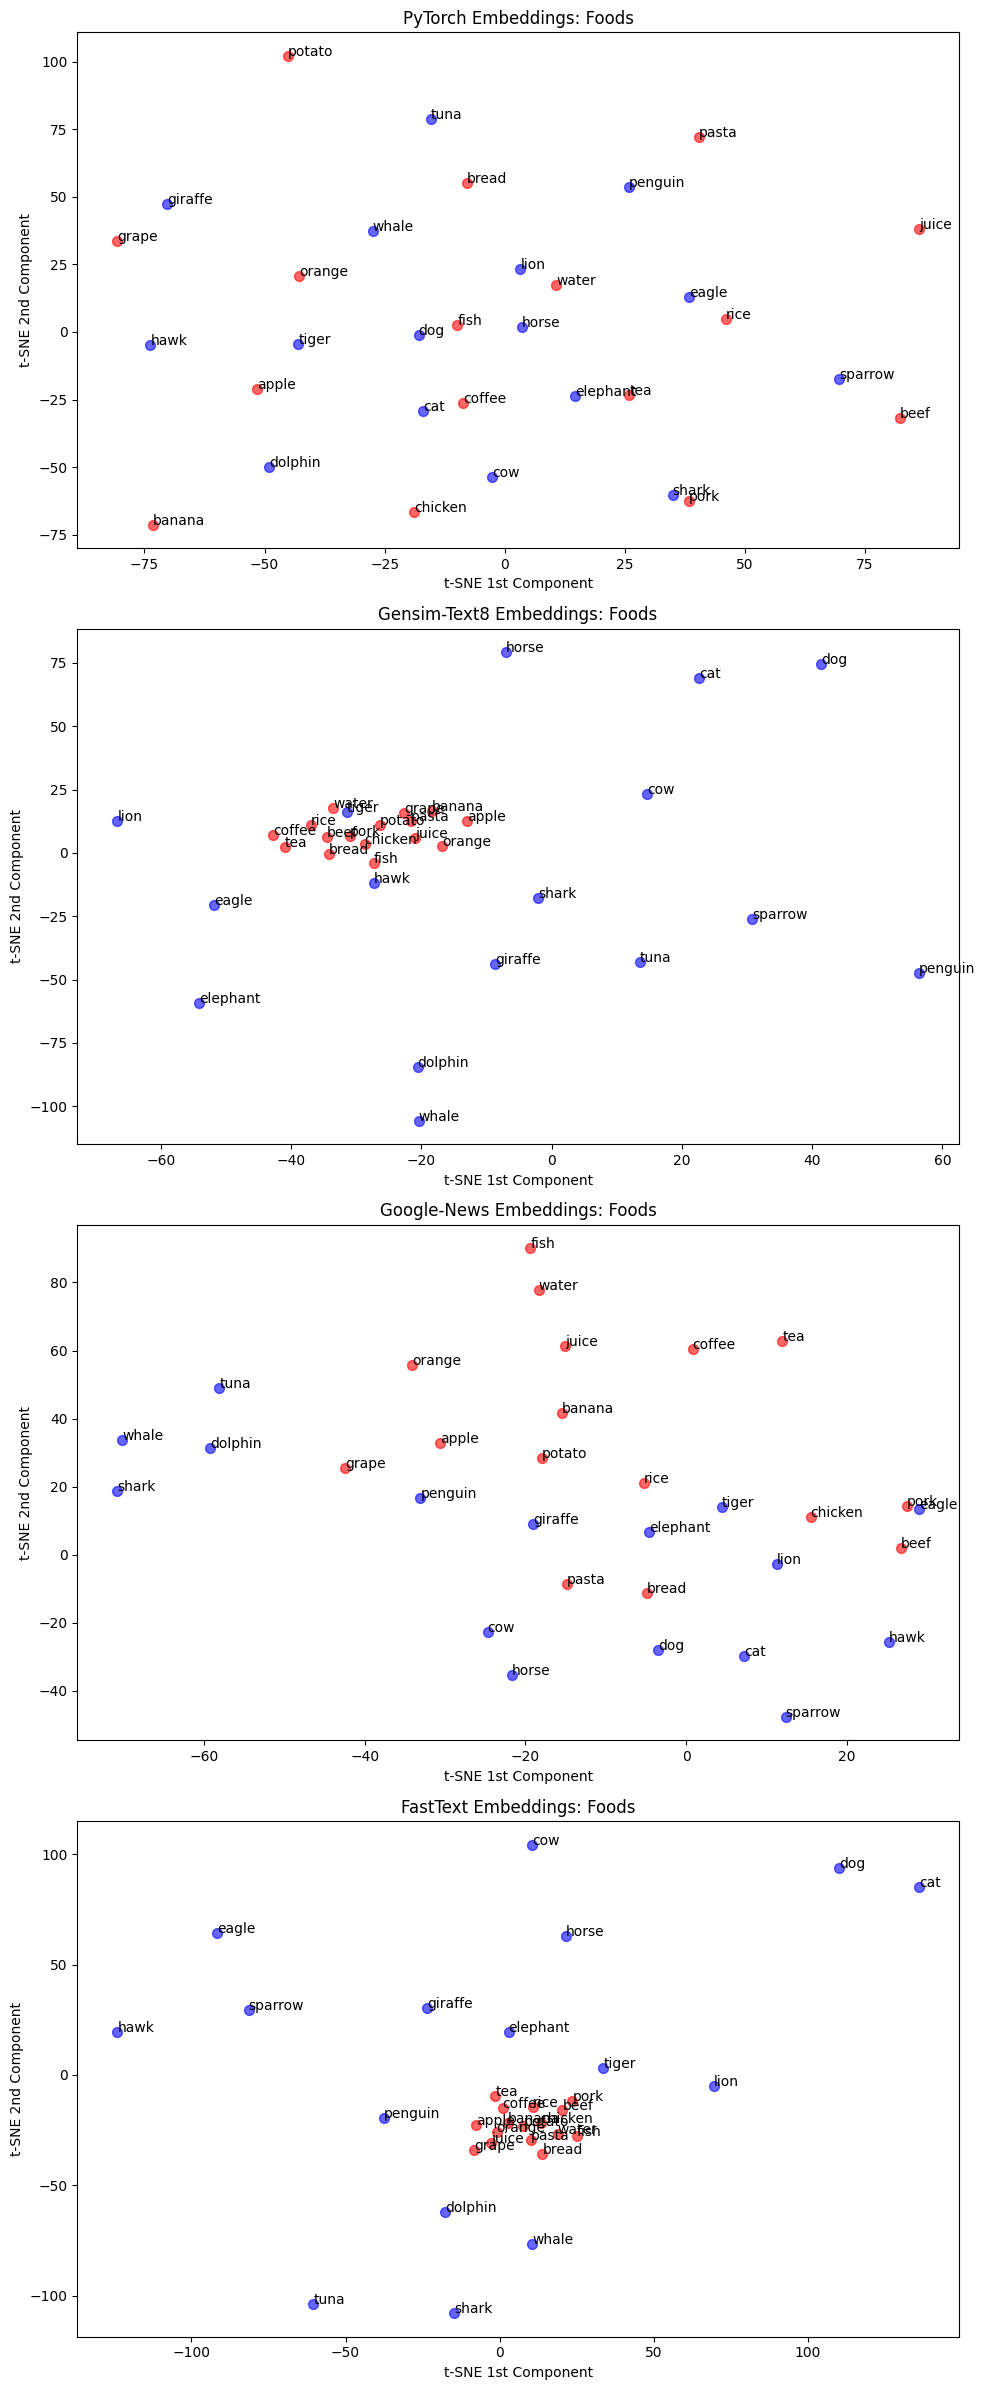

In [41]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=5, random_state=42) 
def get_word_emb(word, w2idx, embs):
    if word in w2idx:
        idx = w2idx[word]
        return embs[idx]
    else:
        return np.zeros(embs.shape[1])

fig, ax = plt.subplots(4, 1, figsize=(10, 24))
    
for i, (name, emb, w2idx) in enumerate(models):

    ani_embs = np.array([get_word_emb(word, w2idx, emb) for word in animals])
    foods_embs = np.array([get_word_emb(word, w2idx, emb) for word in foods])

    ani_tsne = tsne.fit_transform(ani_embs)
    foods_tsne = tsne.fit_transform(foods_embs)

    ax[i].scatter(ani_tsne[:, 0], ani_tsne[:, 1], c="blue", s=50, alpha=0.6)
    ax[i].set_xlabel('t-SNE 1st Component')
    ax[i].set_ylabel('t-SNE 2nd Component')
    ax[i].set_title(f'{name} Embeddings: Animals')
    for j, word in enumerate(animals):
        ax[i].annotate(word, (ani_tsne[j, 0], ani_tsne[j, 1]))
        
    ax[i].scatter(foods_tsne[:, 0], foods_tsne[:, 1], c="red", s=50, alpha=0.6)
    ax[i].set_xlabel('t-SNE 1st Component')
    ax[i].set_ylabel('t-SNE 2nd Component')
    ax[i].set_title(f'{name} Embeddings: Foods')
    for j, word in enumerate(foods):
        ax[i].annotate(word, (foods_tsne[j, 0], foods_tsne[j, 1]))

plt.tight_layout()
plt.show()

- Which embeddings performed best at capturing sentence meaning?

The Gensim embedding trained on text 8 and the Fasttest embedding

- Were the pretrained embeddings significantly better than your own? Why or why not?
Yes. The pretrained embeddings were clearly better. They produced more coherent semantic structure, where related words such as animals or foods clustered together, while the embeddings trained from scratch showed much weaker or noisy structure. This is mainly because pretrained models are trained on much larger corpora and with carefully engineered training strategies

- What factors might explain the differences in performance?
The main factors are corpus size and quality, training details such as subsampling frequent words, dynamic context windows, and cleaner negative sampling, and longer, more stable training. Pretrained embeddings also benefit from better handling of rare words, whereas a small, custom-trained model lacks enough data and signal to learn robust semantic relationships.

## AI Use Disclosure (Required)

If you used any AI-enabled tools (e.g., ChatGPT, GitHub Copilot, Claude, or other LLM assistants) while working on this assignment, you must disclose that use here. The goal is transparency-not punishment.

In your disclosure, briefly include:
- **Tool(s) used:** (name + version if known)
- **How you used them:** (e.g., concept explanation, debugging, drafting code, rewriting text)
- **What you verified yourself:** (e.g., reran the notebook, checked outputs/plots, checked shapes, read documentation)
- **What you did *not* use AI for (if applicable):** (optional)

You are responsible for the correctness of your submission, even if AI suggested code or explanations.

I used Chatgpt to generate training framework and used it for debugging.
